In [2]:
import numpy as np
import pandas as pd

# Data Preprocessing

In [3]:
data = pd.read_excel('concrete_data.xlsx')
data


,cement,water,superplasticizer,age,concrete_compressive_strength
0,540.0,162.0,2.5,28,79.99
1,540.0,162.0,2.5,28,61.89
2,332.5,228.0,0.0,270,40.27
3,332.5,228.0,0.0,365,41.05
4,198.6,192.0,0.0,360,44.30
...,...,...,...,...,...
695,116.0,192.0,0.0,28,22.35
696,183.9,203.5,0.0,7,10.79
697,108.3,203.5,0.0,7,7.72
698,203.5,203.5,0.0,28,41.68


## Data Profiling

In [24]:
import ydata_profiling

report = ydata_profiling.ProfileReport(data, minimal=True)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Splitting Data To Training and Testing Data 

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Splitting Data to Training and Testing
target = data.iloc[:, 4].values  # last column
features = data.iloc[:, :4].values  # the rest of the columns

# Normalize the Data
# Normalization ensures that all features are on the same scale, 
# preventing any single feature with a larger magnitude from dominating the learning process.
scaler = MinMaxScaler()
features_normalized = scaler.fit_transform(features)

# Splitting Data to Training and Testing Data
X_train, X_test, y_train, y_test = train_test_split(
  features, target, test_size=0.25, random_state=119
)

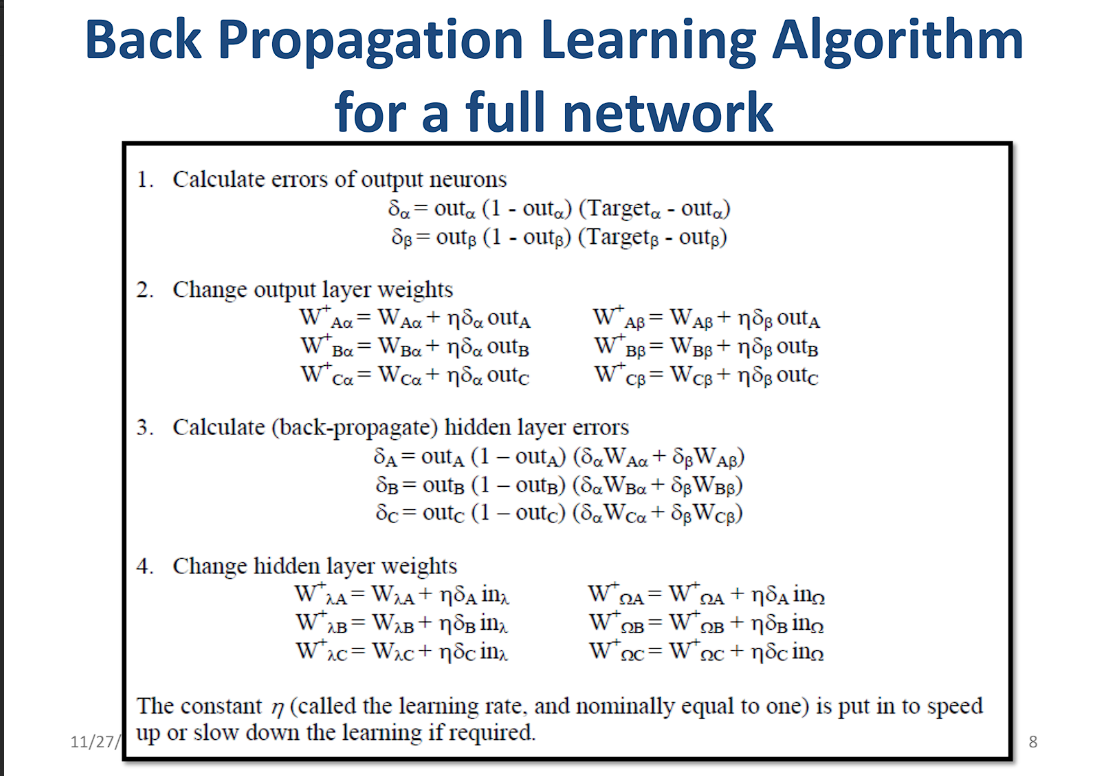

## Implementation of ANN (Artificial Neural Network)

In [ ]:
from scipy.special import expit
from sklearn.metrics import mean_squared_error  # For stable sigmoid

class NeuralNetwork:
    epoch = 10000
    learning_rate = 0.1
    def __init__(self, X_train, y_train, neurons=8):
        self.neurons = neurons
        # Treat bias as a feature (column in data) vector (700, 1) and initialize it with one
        self.b = np.ones((X_train.shape[0], 1))  
        # Include bias to the features (Treat it as one of the inputs to getting the weight for it)
        self.X = np.hstack((X_train, self.b))
        self.y = y_train
        # hidden layer have 8 neurons have in/out values
        # and each training example has this vector (8,2) => (700, 8 , 2) (training examples, neurons, in/out)
        self.hidden_layer = np.zeros((self.X.shape[0], 8, 2)) 
        
        input_size = self.X.shape[1]
        output_size = 1
        # in-to-hidden layer weights: (input_size × neurons)
        w1_shape = (input_size, self.neurons)    # Shape: (5, 8)
        # hidden-to-output layer weights: (neurons × output_size)
        w2_shape = (self.neurons, output_size)   # Shape: (8, 1)
        
        # Initialize weights using He initialization
        self.w1 = np.random.randn(w1_shape[0], w1_shape[1]) * np.sqrt(2 / input_size)
        self.w2 = np.random.randn(w2_shape[0], w2_shape[1]) * np.sqrt(2 / self.neurons)

    def feed_forward_pass(self):
        # Input To Hidden Layer
        # Calculate hidden input for each neuron (sum of weights * inputs)
        self.hidden_layer[:, :, 0] = np.dot(self.X, self.w1)  # First column is input
        # Calculate hidden output using sigmoid activation
        self.hidden_layer[:, :, 1] = expit(self.hidden_layer[:, :, 0]) 
        # Hidden Layer to Output Layer
        y_pred_in = np.dot(self.hidden_layer[:, :, 1], self.w2)
        self.y_pred_out = expit(y_pred_in).flatten() # flatten to reshape from (525, 1) to (525,) to match y_train
        return self.y_pred_out

    def calc_mse(self, y_pred):
        self.y - y_pred
        return 0.5 * np.mean((y_pred - self.y) ** 2)

    # Cost Function
    def calc_output_error(self):
        cost = self.y_pred_out * (1 - self.y_pred_out) * (self.y - self.y_pred_out)
        cost = cost.reshape(-1, 1) # reshape from (525,) to (525, 1) to meet the weight update formula
        return cost

    def calc_hidden_layer_error(self, error_y=None):
        if error_y is None:
            error_y = self.calc_output_error()

        h_out = self.hidden_layer[:, :, 1]
        # print(f"h_out shape => {h_out.shape}")
        # print(f"error_y shape => {error_y.shape}")
        # print(f"w2 shape => {self.w2.shape}")

        cost = h_out * (1 - h_out) * np.dot(error_y, self.w2.T)
        return cost

    def back_propagation(self):
        # calc output error
        error_y = self.calc_output_error()
        # update Weights
        self.w2 += self.learning_rate *  np.dot(self.hidden_layer[:, :, 1].T, error_y)
        error_hidden = self.calc_hidden_layer_error(error_y=error_y)
        self.w1 += self.learning_rate * np.dot(self.X.T, error_hidden)

nn = NeuralNetwork(X_train, y_train, 8)
output = nn.feed_forward_pass()
print("it 1")
print(nn.calc_mse(output))
nn.back_propagation()
print("it 2")
output2 = nn.feed_forward_pass()
print(nn.calc_mse(output2))
nn.back_propagation()
output3 = nn.feed_forward_pass()
print(nn.calc_mse(output3))

it 1
837.7916536496958
it 2
804.7489243809524
804.7489243809524
